### IMPORTING THE REQUIRED LIBRARIES 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tb

#### Read the dataset

In [2]:
hosp=pd.read_csv(r"F:\HospitalityEmployees.csv",index_col='Date',parse_dates=True)

In [3]:
hosp.head(5)

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [4]:
hosp.shape

(348, 1)

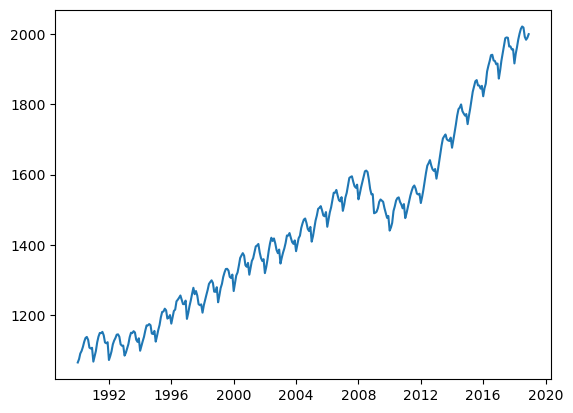

In [5]:
plt.plot(hosp)

#### Using Seasonal Decompose Understanding the underlying patterns and trends

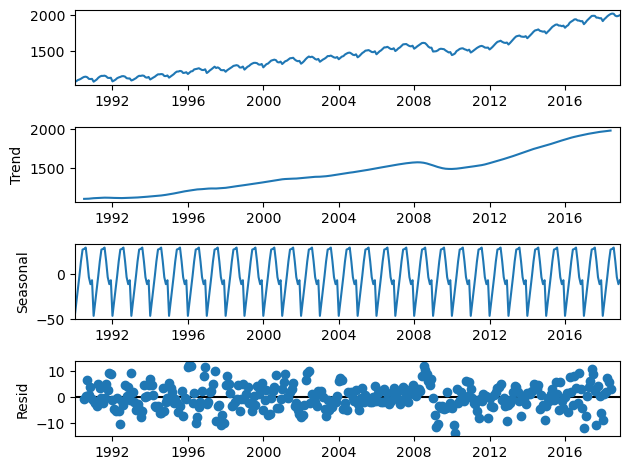

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
hosp_seasonal=seasonal_decompose(hosp)
hosp_seasonal.plot()
plt.show()

CONCLUSION: our data is in uptrend and it is yearly seasonal

#### Normality Test

In [7]:
def adf_test_normality(series):
    from statsmodels.tsa.stattools import adfuller
    adfuller(series)
    p_value=adfuller(series)[1]
    print('p_value=',p_value)
    if p_value<0.05:
        print('p_value <0.05')
        print('series is stationary')
    else:
        print('p_value > 0.05')
        print('series is not stationary')

In [8]:
adf_test_normality(hosp)

p_value= 0.9931070655289933
p_value > 0.05
series is not stationary


In [9]:
adf_test_normality(hosp.diff().dropna())

p_value= 0.028991505238967034
p_value <0.05
series is stationary


Original data is not stationary while after 1 differencing series become stationary therefore in auto_arima d=1 is must

#### Building the model using AUTO ARIMA and SARIMA

In [10]:
import pmdarima
from pmdarima import auto_arima

In [11]:
auto_arima(hosp , seasonal=True , m=12)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

12 is our data is seasonal in time interval of 12 months

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
model_sarima=SARIMAX(hosp , order=(1,1,2),seasonal_order=(1,0,1,12))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Put the same orders and seasonal order we get from auto arima

#### Model Created


In [14]:
result=model_sarima.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [15]:
pred=result.predict(start=348 , end=359)

As our shape is 348 so we predict fron next year i.e next 12 months

In [16]:
pred

2019-01-01    1963.876185
2019-02-01    1986.819293
2019-03-01    2006.001561
2019-04-01    2030.338169
2019-05-01    2050.319441
2019-06-01    2067.145505
2019-07-01    2074.926736
2019-08-01    2076.490740
2019-09-01    2056.901085
2019-10-01    2051.846458
2019-11-01    2047.933763
2019-12-01    2053.899432
Freq: MS, Name: predicted_mean, dtype: float64

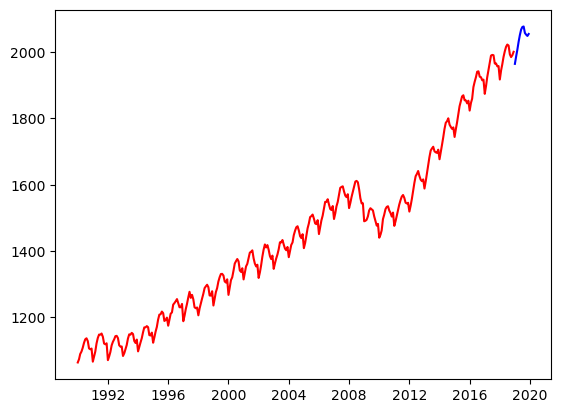

In [17]:
plt.plot(hosp , color='r')
plt.plot(pred , color='b')

In [18]:
train=hosp.iloc[0:336,]
test=hosp.iloc[336:348,]

In [19]:
model_sarima=SARIMAX(train , order=(1,1,2),seasonal_order=(1,0,1,12))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
result1=model_sarima.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [21]:
predict=result1.predict(start=336 , end=347)

In [22]:
predict

2018-01-01    1922.287409
2018-02-01    1941.846769
2018-03-01    1959.855611
2018-04-01    1983.206006
2018-05-01    2002.911672
2018-06-01    2019.444159
2018-07-01    2026.308550
2018-08-01    2028.249737
2018-09-01    2009.869509
2018-10-01    2004.775773
2018-11-01    1996.723129
2018-12-01    2000.526598
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot Between Actual and Predicted

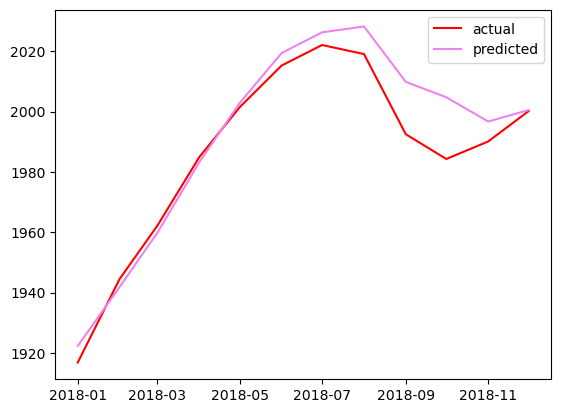

In [23]:
plt.plot(test,color = 'r',label = 'actual')
plt.plot(predict,color = 'violet',label = 'predicted')
plt.legend()

In [24]:
df=pd.DataFrame()
df['actual']=hosp.iloc[336:348,]
df['predicted']=predict
df['error']=df.actual-df.predicted
df['%diff']=np.abs(df.error)*100/df.actual
print(tb.tabulate(df,headers='keys',tablefmt='fancy_grid'))
MSE=np.mean(np.square(df.error))
print('MSE:',MSE)
MAPE=np.mean(df['%diff'])
print('MAPE:',MAPE)

╒═════════════════════╤══════════╤═════════════╤════════════╤═══════════╕
│ Date                │   actual │   predicted │      error │     %diff │
╞═════════════════════╪══════════╪═════════════╪════════════╪═══════════╡
│ 2018-01-01 00:00:00 │   1916.8 │     1922.29 │  -5.48741  │ 0.28628   │
├─────────────────────┼──────────┼─────────────┼────────────┼───────────┤
│ 2018-02-01 00:00:00 │   1944.5 │     1941.85 │   2.65323  │ 0.136448  │
├─────────────────────┼──────────┼─────────────┼────────────┼───────────┤
│ 2018-03-01 00:00:00 │   1962.2 │     1959.86 │   2.34439  │ 0.119478  │
├─────────────────────┼──────────┼─────────────┼────────────┼───────────┤
│ 2018-04-01 00:00:00 │   1984.9 │     1983.21 │   1.69399  │ 0.085344  │
├─────────────────────┼──────────┼─────────────┼────────────┼───────────┤
│ 2018-05-01 00:00:00 │   2001.5 │     2002.91 │  -1.41167  │ 0.0705307 │
├─────────────────────┼──────────┼─────────────┼────────────┼───────────┤
│ 2018-06-01 00:00:00 │   2015.3 │    

### CONCLUSION

Our analysis of the Hospitality Employees time series dataset has provided valuable insights into future employment trends in the hospitality industry. After performing data exploration and analysis techniques, we built a forecasting model that predicts future employment trends in the industry. Based on our model, we can conclude that the hospitality industry is expected to experience steady growth in employment over the next few years. This information can be useful for businesses in the hospitality industry to make informed decisions regarding staffing and planning for future growth.